# Dataiku Data Challenge
#### Author: Peter Martigny
#### Date: January 2017

In [1]:
import pandas as pd
pd.set_option('display.max_columns', False) # set options to see all columns
import numpy as np

#### Import statements

In [2]:
data = pd.read_csv('census_income_learn.csv', header=None)
data_test = pd.read_csv('census_income_test.csv', header=None)

In [3]:
print("Both datasets contain {} columns. The train set has {} rows, and the test set has {} rows".format(data.shape[1], len(data), len(data_test)))
print('Hence, {} percent of the whole dataset is kept for the training part, the rest for the test part.'.format(100*(len(data) / (len(data) + len(data_test)))))

Both datasets contain 42 columns. The train set has 199523 rows, and the test set has 99762 rows
Hence, 66.66655529010809 percent of the whole dataset is kept for the training part, the rest for the test part.


#### Statistics for train set

In [4]:
# Number of rows
print('Number of instances data =', len(data))
# Number of duplicates (this is not necessarily a bad things, since it is possible that 
# 2 persons share the same characteristics)
print('Number of duplicates =', len(data) - len(data.drop_duplicates()) )

target = data[41].value_counts()
print(target)
print('Probability for the label 50000+ =', target[1] / (target[0] + target[1]))
print('Probability for the label -50000 =', target[0] / (target[0] + target[1]))

Number of instances data = 199523
Number of duplicates = 3229
 - 50000.    187141
 50000+.      12382
Name: 41, dtype: int64
Probability for the label 50000+ = 0.0620580083499
Probability for the label -50000 = 0.93794199165


In [5]:
# As explained in the metadata, we do not use the instance weights variable, which is the column 24
# We remove the column and reset the columns index
del data[24]
data.columns = np.arange(0, 41)

del data_test[24]
data_test.columns = np.arange(0, 41)

In [6]:
# Are there any missing data?
data.isnull().sum().sum()

0

The dataset has no apparent missing value. In facts, there are missing values, but they are considered as categories within categorical variables. Hence, we will use them as such.

In [7]:
# Let's separate continuous and categorical variables
continuous = [0, 5, 16, 17, 18, 29, 38]
categorical = [x for i, x in enumerate(list(data.columns)) if x not in continuous]
#  Some variables are considered as continuous whereas they are prsented as categorical 
#in the metadata file
for i in [2, 3, 35, 37, 39]:
    data[i] = data[i].apply(str)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,199523.0,34.494199,22.310895,0.0,15.0,33.0,50.0,90.0
5,199523.0,55.426908,274.896454,0.0,0.0,0.0,0.0,9999.0
16,199523.0,434.718990,4697.531280,0.0,0.0,0.0,0.0,99999.0
17,199523.0,37.313788,271.896428,0.0,0.0,0.0,0.0,4608.0
18,199523.0,197.529533,1984.163658,0.0,0.0,0.0,0.0,99999.0
29,199523.0,1.956180,2.365126,0.0,0.0,1.0,4.0,6.0
38,199523.0,23.174897,24.411488,0.0,0.0,8.0,52.0,52.0


In [9]:
data.corr()

,0,5,16,17,18,29,38
0,1.000000,0.036938,0.053590,0.063351,0.104976,0.140887,0.206181
5,0.036938,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.195687
16,0.053590,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.083549
17,0.063351,0.010993,-0.012700,1.000000,0.042427,0.084255,0.100762
18,0.104976,-0.005731,0.131476,0.042427,1.000000,0.007206,0.013823
29,0.140887,0.191543,0.058015,0.084255,0.007206,1.000000,0.747302
38,0.206181,0.195687,0.083549,0.100762,0.013823,0.747302,1.000000


In [10]:
# Now, let's scale the continuous data
data_continuous = data[continuous]
for variable in continuous:
    mean = data[variable].mean()
    std = data[variable].std()
    data[variable] = (data[variable] - mean) / std
    data_continuous[variable] = (data_continuous[variable] - mean) / std

C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
data_continuous.describe().T

,count,mean,std,min,25%,50%,75%,max
0,199523.0,-3.435163e-16,1.0,-1.546070,-0.873752,-0.066972,0.694988,2.487834
5,199523.0,-1.810052e-15,1.0,-0.201628,-0.201628,-0.201628,-0.201628,36.172068
16,199523.0,-5.824909e-15,1.0,-0.092542,-0.092542,-0.092542,-0.092542,21.195022
17,199523.0,-2.138945e-15,1.0,-0.137235,-0.137235,-0.137235,-0.137235,16.810394
18,199523.0,3.099611e-15,1.0,-0.099553,-0.099553,-0.099553,-0.099553,50.299011
29,199523.0,9.308582e-15,1.0,-0.827094,-0.827094,-0.404283,0.864148,1.709770
38,199523.0,5.221289e-15,1.0,-0.949344,-0.949344,-0.621629,1.180801,1.180801


In [12]:
data.corr()

,0,5,16,17,18,29,38
0,1.000000,0.036938,0.053590,0.063351,0.104976,0.140887,0.206181
5,0.036938,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.195687
16,0.053590,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.083549
17,0.063351,0.010993,-0.012700,1.000000,0.042427,0.084255,0.100762
18,0.104976,-0.005731,0.131476,0.042427,1.000000,0.007206,0.013823
29,0.140887,0.191543,0.058015,0.084255,0.007206,1.000000,0.747302
38,0.206181,0.195687,0.083549,0.100762,0.013823,0.747302,1.000000


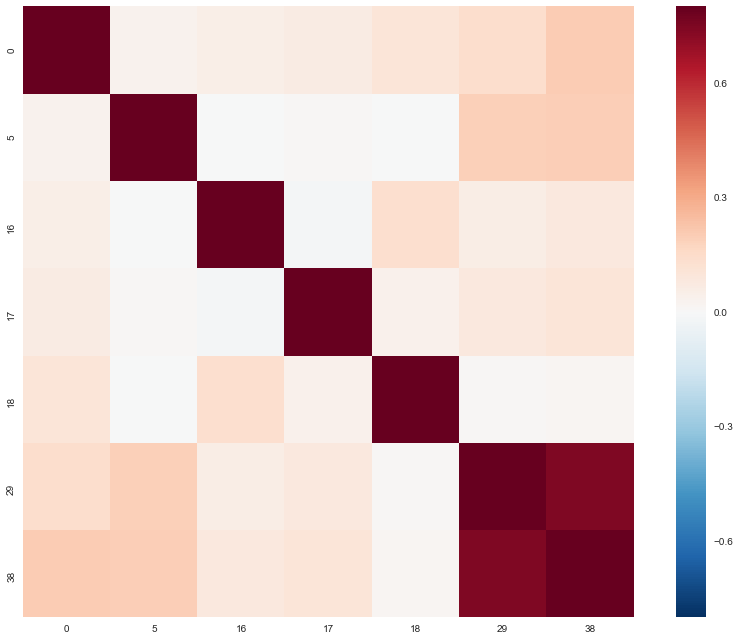

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()

We observethat the variables 29 and 38 are highly correlated. We decide to remove the variable 29 (we want to keep the number of weeks worked in years!)

In [14]:
del data[29]

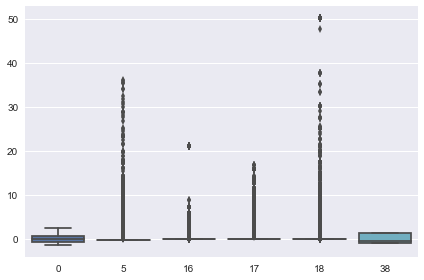

In [15]:
continuous = [0, 5, 16, 17, 18, 38]
categorical = [x for i, x in enumerate(list(data.columns)) if x not in continuous]

ax = sns.boxplot(data=data[continuous],orient='v')
plt.tight_layout()
plt.show()

We see that variable 5, 16, 17 and 18 are really concentrated, but with some outlisers. Variables 0 and 38 have less outlisers but have a larger spread.

Let's plot the boxplots without outliers:

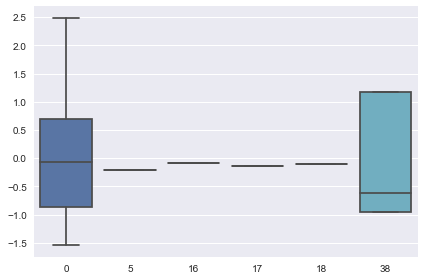

In [16]:
ax = sns.boxplot(data=data[continuous],orient='v', showfliers=False)
plt.tight_layout()
plt.show()

## Features engineering

In [17]:
X = data.ix[:, :39]
y = data[40]

In [18]:
categorical.remove(40)

In [19]:
# Now, we want to dummify the categorical variables. Let's have a look:
pd.get_dummies(X[categorical]).head()

,1_ Federal government,1_ Local government,1_ Never worked,1_ Not in universe,1_ Private,1_ Self-employed-incorporated,1_ Self-employed-not incorporated,1_ State government,1_ Without pay,2_0,2_1,2_10,2_11,2_12,2_13,2_14,2_15,2_16,2_17,2_18,2_19,2_2,2_20,2_21,2_22,2_23,2_24,2_25,2_26,2_27,2_28,2_29,2_3,2_30,2_31,2_32,2_33,2_34,2_35,2_36,...,33_ India,33_ Iran,33_ Ireland,33_ Italy,33_ Jamaica,33_ Japan,33_ Laos,33_ Mexico,33_ Nicaragua,33_ Outlying-U S (Guam USVI etc),33_ Panama,33_ Peru,33_ Philippines,33_ Poland,33_ Portugal,33_ Puerto-Rico,33_ Scotland,33_ South Korea,33_ Taiwan,33_ Thailand,33_ Trinadad&Tobago,33_ United-States,33_ Vietnam,33_ Yugoslavia,34_ Foreign born- Not a citizen of U S,34_ Foreign born- U S citizen by naturalization,34_ Native- Born abroad of American Parent(s),34_ Native- Born in Puerto Rico or U S Outlying,34_ Native- Born in the United States,35_0,35_1,35_2,36_ No,36_ Not in universe,36_ Yes,37_0,37_1,37_2,39_94,39_95
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0


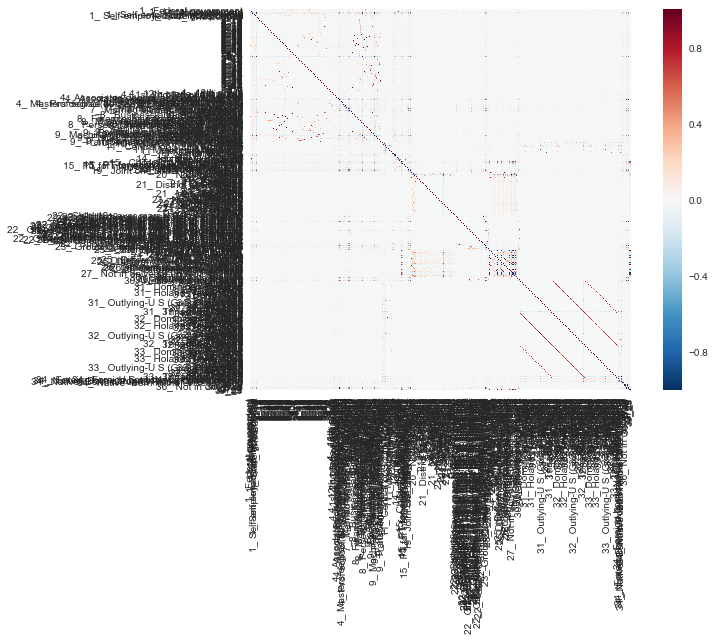

In [20]:
corrmat = pd.get_dummies(X[categorical]).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()

Some features are highly correlated. However, it seems not straightforward to asses which variables to remove. I choose not to remove variables.

In [21]:
# Now it looks better
# X = pd.concat((X[continuous], pd.get_dummies(X[categorical])), axis=1)

In [22]:
X.shape

(199523, 39)

In [23]:
def binarize(x):
    if x == ' - 50000.':
        return 0
    else:
        return 1
y = y.apply(binarize)

In [24]:
y.value_counts()

0    187141
1     12382
Name: 40, dtype: int64

#### Who earns more than 50 000 a year?

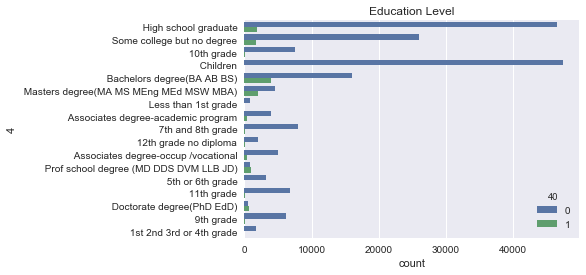

In [25]:
sns.countplot(y=X[4], hue=y)
plt.title('Education Level')
plt.show()

We see that whealthy people are amongst thos who have at least a high school degree.

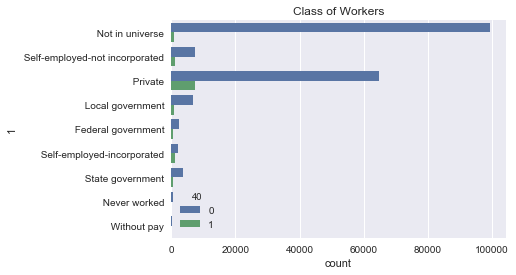

In [26]:
sns.countplot(y=X[1], hue=y)
plt.title('Class of Workers')
plt.show()

There are more wealthy people in the private sector.

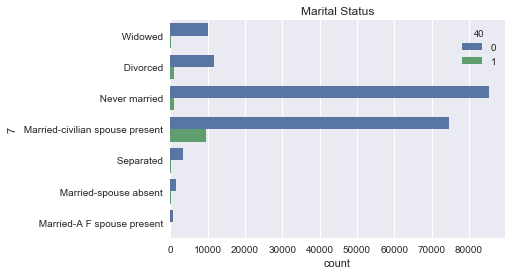

In [27]:
sns.countplot(y=X[7], hue=y)
plt.title('Marital Status')
plt.show()

Wealthy people are generally married.

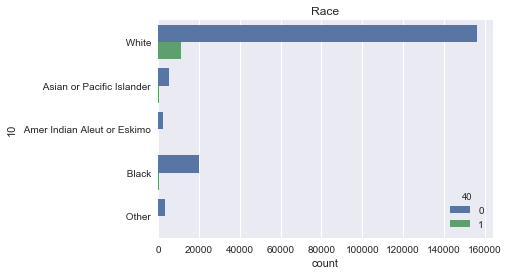

In [28]:
sns.countplot(y=X[10], hue=y)
plt.title('Race')
plt.show()

Welathy people are generally white.

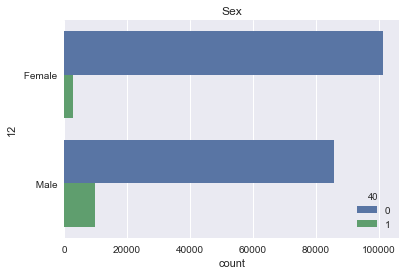

In [29]:
sns.countplot(y=X[12], hue=y)
plt.title('Sex')
plt.show()

Men are more likely to be welathy than women.

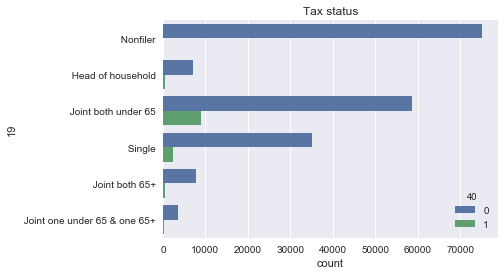

In [30]:
sns.countplot(y=X[19], hue=y)
plt.title('Tax status')
plt.show()

Joint both under 65 and singles are most likely wealthy.

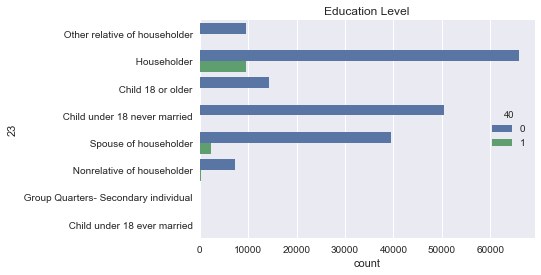

In [31]:
sns.countplot(y=X[23], hue=y)
plt.title('Education Level')
plt.show()

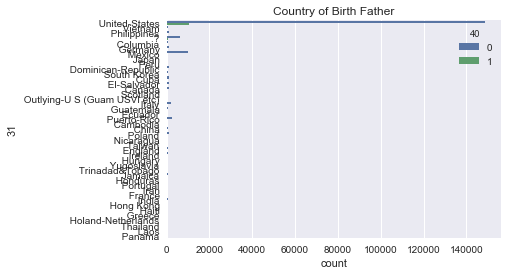

In [32]:
sns.countplot(y=X[31], hue=y)
plt.title('Country of Birth Father')
plt.show()

Wealthy people have their father born in the USA.

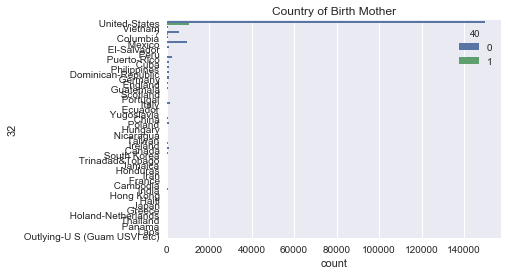

In [33]:
sns.countplot(y=X[32], hue=y)
plt.title('Country of Birth Mother')
plt.show()

Wealthy people have their mother born in the USA.

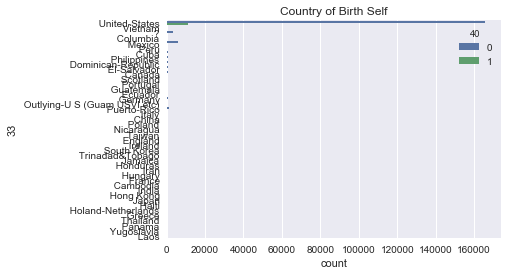

In [34]:
sns.countplot(y=X[33], hue=y)
plt.title('Country of Birth Self')
plt.show()

Wealthy people were themselves born in the USA.

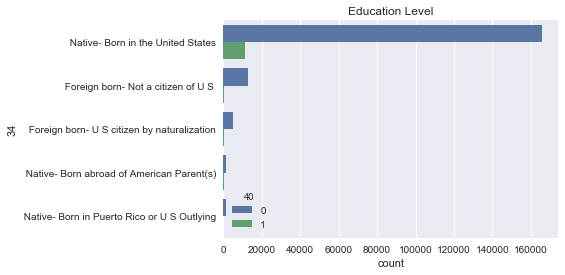

In [35]:
sns.countplot(y=X[34], hue=y)
plt.title('Education Level')
plt.show()

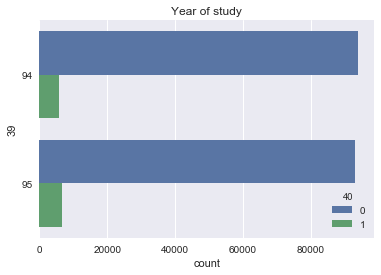

In [36]:
sns.countplot(y=X[39], hue=y)
plt.title('Year of study')
plt.show()

Year of study does not affect wealth.

From what we just saw, several things can be done to continue our study:

- The year of study is not discriminant, we remove it.
- Countries of birth for parents and themselves are highly interdependant, we choos to keep only one variable, the variable 34 with only 5 categories

In [38]:
categorical.remove(31)
categorical.remove(32)
categorical.remove(33)
categorical.remove(39)

In [50]:
X = pd.concat((X[continuous], pd.get_dummies(X[categorical])), axis=1)

In [51]:
X.shape

(199523, 378)

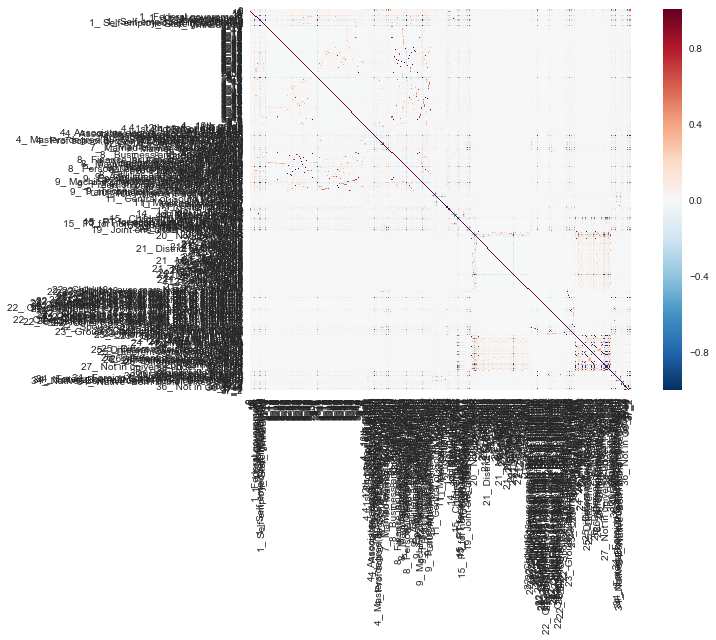

In [52]:
corrmat = a.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()

# Machine Learning

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]

In [116]:
from sklearn.linear_model import LogisticRegression
import time

model = LogisticRegression(solver = 'lbfgs')

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)

Start training
Training done!
The algorithms ran for 12.123624149779062 seconds


In [131]:
def accuracy(predicted, true):
    return (predicted == true).sum() / len(true)
def precision(predicted, true):
    numerator = ((predicted == true) & (true == 1)).sum()
    denominator = ((predicted == true) & (true == 1)).sum() + ((predicted != true) & (true == 0)).sum()
    return numerator / denominator
def recall(predicted, true):
    numerator = ((predicted == true) & (true == 1)).sum()
    denominator = ((predicted == true) & (true == 1)).sum() + ((predicted != true) & (true == 1)).sum()
    return numerator / denominator    
def f1_score(predicted, true):
    a = precision(predicted, true)
    b = recall(predicted, true)
    return 2 * (a*b)/(a+b)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

Accuracy = 0.952369814725
Precision = 0.721538461538
Recall = 0.378734858681
F1_score = 0.496734333628


Are these figures good or bad in our context?
Let's compute these metrics in the case where we always predict the dominant class, here 0.
For the precision and the F1_score to be defined, we predict one 1 at the begining.

In [100]:
pred = [0 for i in range(len(y_test))]
pred[0] = 1

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

Accuracy = 0.937952119217
Precision = 1.0
Recall = 0.000269179004038
F1_score = 0.0005382131324


We see that, speaking of accuracy, the logistic model outperforms the constant prediction of the dominant class, with more than 1% accuracy gain.
We also see here that the precision is not a good metric for this context (the precision is lower for the logistic model). However, the recall and the F1_score seem to be good metrics in this task.

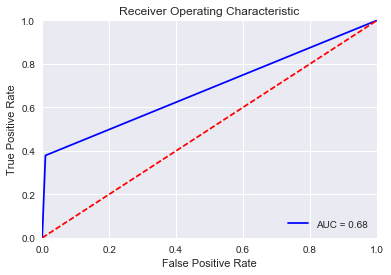

In [145]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# clf1 = LogisticRegression(solver = 'lbfgs')
# skf = StratifiedKFold(n_splits=3, random_state=2016)

# score = cross_val_score(clf1, X, y, cv=skf)
# print(score)

[ 0.95211174  0.95188476  0.95200505]


In [146]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=40, n_jobs=-1)

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)

Start training
Training done!
The algorithms ran for 5.437142395485353 seconds


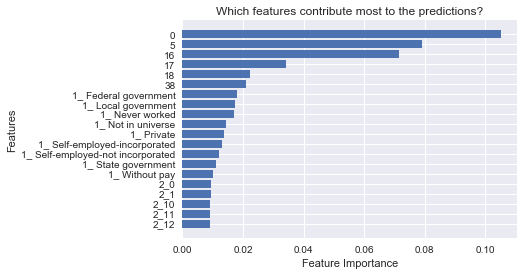

Accuracy = 0.952586999014
Precision = 0.716329551061
Recall = 0.390847913863
F1_score = 0.505747126437


In [148]:
def plot_features(model_features, initial_data, n):

    a = pd.DataFrame(model_features).sort_values(by=0, ascending = False)
    a.index = initial_data.columns
    a = a[:n]

    xs = np.arange(len(a))
    plt.barh(xs, a[0], align='center', alpha=1)
    plt.yticks(xs, a.index)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Which features contribute most to the predictions?')
    plt.gca().invert_yaxis()
    plt.show()
    
plot_features(model.feature_importances_, X, 20)
print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

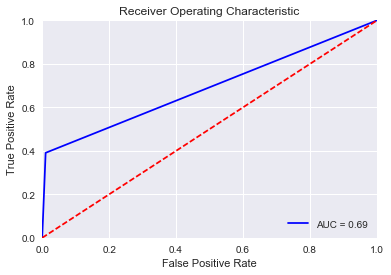

In [149]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
# clf1 = RandomForestClassifier(n_estimators=40, n_jobs=-1)
# skf = StratifiedKFold(n_splits=3, random_state=2016)

# score = cross_val_score(clf1, X_train, y_train, cv=3)
# print(score)

[ 0.95173554  0.95139083  0.95091827]


Start training
Training done!
The algorithms ran for 10.184674151498257 seconds


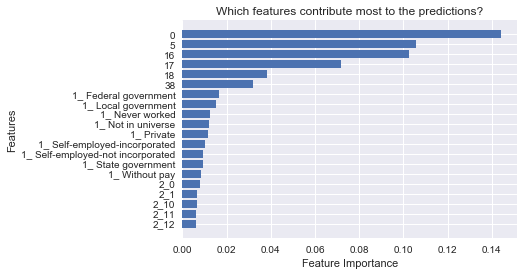

Accuracy = 0.939188399018
Precision = 0.511284983449
Recall = 0.45733512786
F1_score = 0.4828076158


In [151]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_split=5)

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)

plot_features(model.feature_importances_, X, 20)
print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

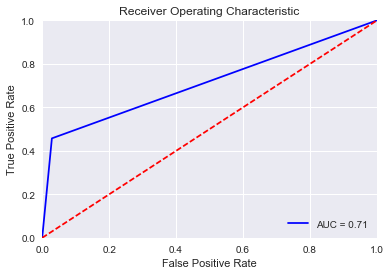

In [152]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [154]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train)

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 2

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(np.array(X_train), np.array(Y_train), nb_epoch=10, batch_size=510/2)

Epoch 1/10


TypeError: slice indices must be integers or None or have an __index__ method

In [32]:
np.array(X_train).shape

(139666, 510)

#### Try with only the numerical variables

In [57]:
X = data_continuous
y = data[40]
y = y.apply(binarize)

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]

In [58]:
model = LogisticRegression(solver = 'lbfgs', C = 1)

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)
print('Test score =', accuracy(pred, y_test))

Start training
Training done!
The algorithms ran for 0.23883033422566768 seconds
Test score = 0.945052374827


Start training
Training done!
The algorithms ran for 12.004755747449963 seconds
Test score = 0.950281504252


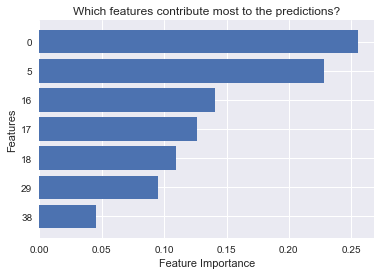

Test score = 0.950281504252


In [60]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators = 200)

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)
print('Test score =', accuracy(pred, y_test))

plot_features(model.feature_importances_, X, 10)
print('Test score =', accuracy(pred, y_test))

In [62]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)
print('Test score =', accuracy(pred, y_test))

print('Test score =', accuracy(pred, y_test))

Start training
Training done!
The algorithms ran for 0.04395333062325335 seconds
Test score = 0.925205072088
Test score = 0.925205072088


In [67]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)
print('Test score =', accuracy(pred, y_test))

Start training
Training done!
The algorithms ran for 29.917932739240314 seconds
Test score = 0.94294735787


In [70]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)
print('Test score =', accuracy(pred, y_test))

Start training
Training done!
The algorithms ran for 3.541683111091743 seconds
Test score = 0.945637101759


In [73]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf3 = GradientBoostingClassifier(n_estimators = 200)
lr = LogisticRegression(solver = 'lbfgs')
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Gradient Boosting',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.94 (+/- 0.00) [KNN]
Accuracy: 0.94 (+/- 0.00) [Random Forest]
Accuracy: 0.95 (+/- 0.00) [Gradient Boosting]
Accuracy: 0.94 (+/- 0.00) [StackingClassifier]


#### Try with only the categorical variables

In [82]:
a, b = (-1, -2)
if a <= 0 or b <= 0:
    print('No')

No


In [50]:
X = data.ix[:, :39]
y = data[40]
y = y.apply(binarize)

for i in [2, 3, 35, 37, 39]:
    X[i] = X[i].apply(str)
    
X = pd.get_dummies(X[categorical])

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y.ix[train_index], y.ix[test_index]

In [53]:
model = GradientBoostingClassifier(n_estimators = 50)

start = time.clock()
print('Start training')
model.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model.predict(X_test)
print('Test score =', accuracy(pred, y_test))

Start training
Training done!
The algorithms ran for 98.0450966379102 seconds
Test score = 0.946188415724


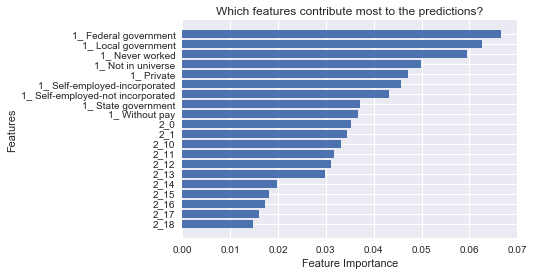

In [55]:
plot_features(model.feature_importances_, X, 20)

### Select manually the relevant features

In [56]:
continuous

[0, 5, 16, 17, 18, 29, 38]